## Getting Data 

In [1]:
import quandl
data = quandl.get("EOD/HD", authtoken="dusYQoyrxzBKnR4esBk9")

## Imports 

In [26]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
dataset = pd.DataFrame(data['Close'])

In [4]:
# Last n values become Nan
data['Predictions'] = data['Close'].shift(-10)

In [5]:
y = data['Predictions']

In [6]:
x = data['Close']

In [7]:
x = x[:-10]
y = y[:-10]

In [8]:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [10]:
x_test.shape

(216, 1)

In [11]:
x_train.shape

(864, 1)

In [12]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train = x_train.reshape(x_train.shape[0],  x_train.shape[1],1)

In [21]:
x_train.shape

(864, 1, 1)

In [14]:
x_test = x_test.reshape(x_test.shape[0],  x_test.shape[1], 1)

## Model Creation and Compilation 

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100,input_shape = (x_train.shape[1],1), return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
    
])

In [30]:
start = time.time()
model.compile(loss = 'mean_squared_error', optimizer='adam')
print('compilation time: {}'.format(time.time() - start))

compilation time: 0.03454875946044922


In [31]:
model.fit(x_train, y_train, batch_size=128, epochs=50,verbose = True)

Train on 864 samples
Epoch 1/50
864/864 [==============================] - 2s 2ms/sample - loss: 14758.3522
Epoch 2/50
864/864 [==============================] - 0s 59us/sample - loss: 14730.4012
Epoch 3/50
864/864 [==============================] - 0s 57us/sample - loss: 14691.5132
Epoch 4/50
864/864 [==============================] - 0s 56us/sample - loss: 14632.6979
Epoch 5/50
864/864 [==============================] - 0s 70us/sample - loss: 14541.2095
Epoch 6/50
864/864 [==============================] - 0s 53us/sample - loss: 14397.9455
Epoch 7/50
864/864 [==============================] - 0s 66us/sample - loss: 14168.4299
Epoch 8/50
864/864 [==============================] - 0s 69us/sample - loss: 13813.8155
Epoch 9/50
864/864 [==============================] - 0s 62us/sample - loss: 13277.9500
Epoch 10/50
864/864 [==============================] - 0s 67us/sample - loss: 12493.0383
Epoch 11/50
864/864 [==============================] - 0s 59us/sample - loss: 11383.5281
Epoch 12/5

In [32]:
model.evaluate(x_test, y_test)

216/216 [==============================] - 1s 4ms/sample - loss: 892.7856


892.7855767144097

In [33]:
pred = model.predict(x_test)

In [23]:
y_test                                         

array([[114.95],
       [110.98],
       [ 99.64],
       [116.93],
       [116.5 ],
       [159.38],
       [112.24],
       [113.35],
       [ 82.41],
       [135.6 ],
       [190.19],
       [135.04],
       [116.89],
       [100.67],
       [133.53],
       [104.12],
       [182.58],
       [131.57],
       [185.98],
       [114.63],
       [ 90.82],
       [ 93.26],
       [113.86],
       [158.13],
       [ 88.93],
       [135.6 ],
       [153.5 ],
       [156.64],
       [ 79.84],
       [137.96],
       [156.46],
       [148.21],
       [ 80.03],
       [ 99.64],
       [162.71],
       [172.33],
       [182.  ],
       [156.59],
       [130.45],
       [134.31],
       [146.54],
       [131.85],
       [ 79.  ],
       [105.37],
       [ 76.99],
       [128.59],
       [135.01],
       [ 98.24],
       [147.8 ],
       [ 76.24],
       [122.2 ],
       [150.79],
       [128.93],
       [131.35],
       [116.43],
       [110.37],
       [ 79.86],
       [130.43],
       [146.34

In [20]:
pred

array([[[119.43408 ]],

       [[113.2576  ]],

       [[120.61221 ]],

       [[120.3289  ]],

       [[118.68265 ]],

       [[119.89139 ]],

       [[114.429306]],

       [[120.57303 ]],

       [[114.11756 ]],

       [[119.96843 ]],

       [[120.08632 ]],

       [[120.81152 ]],

       [[117.87306 ]],

       [[114.0887  ]],

       [[120.01354 ]],

       [[120.398705]],

       [[114.318375]],

       [[114.27305 ]],

       [[117.393555]],

       [[119.970116]],

       [[119.01138 ]],

       [[119.42667 ]],

       [[118.96742 ]],

       [[120.101364]],

       [[120.82617 ]],

       [[119.97639 ]],

       [[119.81047 ]],

       [[120.092896]],

       [[113.38598 ]],

       [[120.684364]],

       [[120.57121 ]],

       [[119.983055]],

       [[120.680855]],

       [[116.33779 ]],

       [[118.50928 ]],

       [[120.3643  ]],

       [[113.32945 ]],

       [[113.63406 ]],

       [[120.33987 ]],

       [[113.5315  ]],

       [[120.03015 ]],

       [[119.854

In [21]:
import matplotlib.pyplot as plt

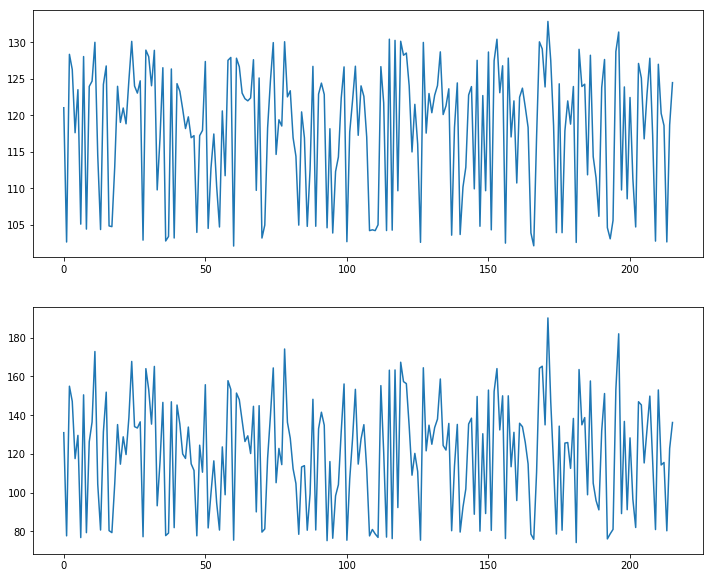

In [34]:
fig,ax = plt.subplots(2,1, figsize = (12,10))
ax[0].plot(pred.reshape(-1,1))

ax[1].plot(y_test)

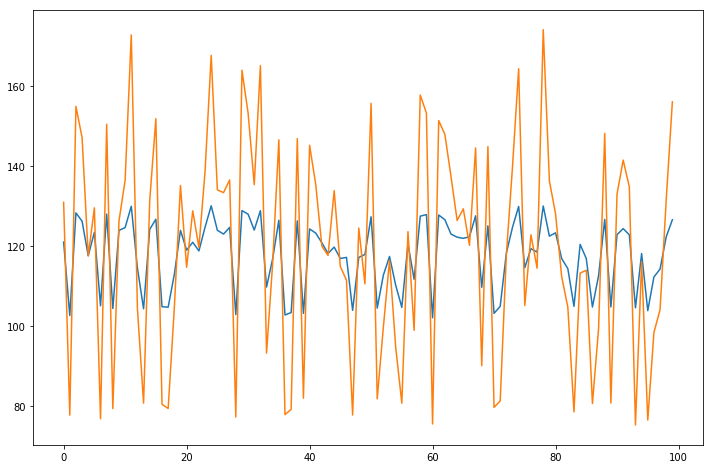

In [37]:
fig = plt.figure(figsize = (12,8))
plt.plot(pred.reshape(-1,1)[:100])
plt.plot(y_test[:100])

In [27]:
mean_absolute_error(y_test, pred.reshape(-1,1))

22.302561333267775

In [28]:
from math import sqrt
sqrt(mean_squared_error(y_test, pred.reshape(-1,1)))

26.24909031626702